In [317]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [318]:
df = pd.DataFrame()

In [319]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [320]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


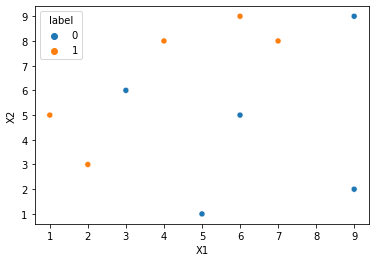

In [321]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [322]:
df['weights'] = 1/df.shape[0]

In [323]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [324]:
from sklearn.tree import DecisionTreeClassifier

In [325]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [326]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [327]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

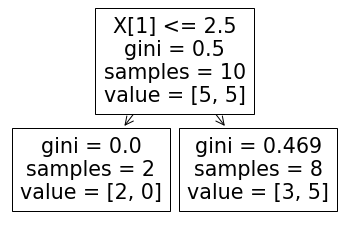

In [328]:
from sklearn.tree import plot_tree
plot_tree(dt1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


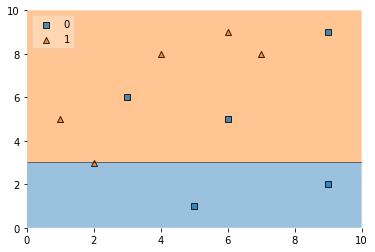

In [329]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [330]:
df['y_pred'] = dt1.predict(X)

In [331]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [332]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [333]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [334]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [335]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [336]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [337]:
df['updated_weights'].sum()

0.9165153319682015

In [338]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [339]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [340]:
df['nomalized_weights'].sum()

1.0

In [341]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [342]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [343]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [344]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [345]:
index_values = create_new_dataset(df)

index_values

[4, 2, 0, 8, 3, 9, 6, 8, 4, 0]

In [346]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [347]:
second_df

,X1,X2,label,weights
4,5,1,0,0.1
2,3,6,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
4,5,1,0,0.1
0,1,5,1,0.1


In [348]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [349]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [350]:
dt2.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[0] <= 4.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(83.7, 54.360000000000014, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

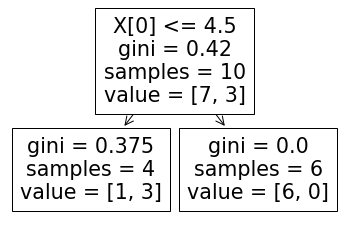

In [351]:
plot_tree(dt2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


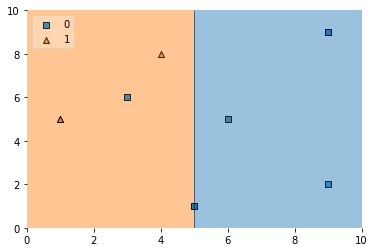

In [352]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [353]:
second_df['y_pred'] = dt2.predict(X)

In [354]:
second_df

,X1,X2,label,weights,y_pred
4,5,1,0,0.1,0
2,3,6,0,0.1,1
0,1,5,1,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
9,9,2,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,0
4,5,1,0,0.1,0
0,1,5,1,0.1,1


In [355]:
alpha2 = calculate_model_weight(0.1)

In [356]:
alpha2

1.0986122886681098

In [357]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [358]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [359]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
4,5,1,0,0.1,0,0.033622
2,3,6,0,0.1,1,0.297427
0,1,5,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622


In [360]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [361]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
4,5,1,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,1,0.297427,0.495694
0,1,5,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034


In [362]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [363]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [364]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [365]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
4,5,1,0,0.1,0,0.056034,0.000000,0.056034
2,3,6,0,0.1,1,0.495694,0.056034,0.551728
0,1,5,1,0.1,1,0.056034,0.551728,0.607762
8,9,9,0,0.1,0,0.056034,0.607762,0.663796
3,4,8,1,0.1,1,0.056034,0.663796,0.719830
9,9,2,0,0.1,0,0.056034,0.719830,0.775864
6,6,5,0,0.1,0,0.056034,0.775864,0.831898
8,9,9,0,0.1,0,0.056034,0.831898,0.887932
4,5,1,0,0.1,0,0.056034,0.887932,0.943966
0,1,5,1,0.1,1,0.056034,0.943966,1.000000


In [366]:
index_values = create_new_dataset(second_df)

In [367]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [368]:
third_df

,X1,X2,label,weights
3,4,8,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1
0,1,5,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1


In [369]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


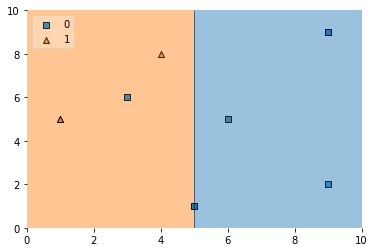

In [370]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [371]:
third_df['y_pred'] = dt3.predict(X)

In [372]:
third_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,0
0,1,5,1,0.1,1
6,6,5,0,0.1,1
0,1,5,1,0.1,0
0,1,5,1,0.1,1
3,4,8,1,0.1,0
0,1,5,1,0.1,0
0,1,5,1,0.1,0
0,1,5,1,0.1,0
0,1,5,1,0.1,1


In [373]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [374]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


### Prediction

In [375]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [376]:
dt2.predict(query)

array([1])

In [377]:
dt3.predict(query)

array([1])

In [378]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [379]:
np.sign(1.09)

1.0

In [380]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [381]:
dt2.predict(query)

array([0])

In [382]:
dt3.predict(query)

array([0])

In [383]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [384]:
np.sign(-0.25)

-1.0